In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat
import pysindy as ps
import sdeint

In [78]:
#Pendulum
g=9         #gravity aprrox
l=3         #pendulum length
lam = 0.2   #decay 
c1= 1     #noise eqn1
c2= 0     #noise eqn2
tspan = np.linspace(0.0, 25, 2500) #time evolutuion
x0 = [2., 0] #initial_conditions
dt=0.01

#Sindy
poly_order = 1
threshold = .105
smoothed_fd=ps.SmoothedFiniteDifference()

#setup of SDE's    
A = np.array([[-lam, 3],[ -(g/l), -lam]]) 
    
B = np.diag([np.sqrt(dt)*(c1)*(np.random.randn()), np.sqrt(dt)*(c2)*(np.random.randn())]) #so independent driving Wiener processes 

def f(x, t):
        return A.dot(x)

def G(x, t):
        return B
    
def getData():
    result = sdeint.itoint(f, G, x0, tspan)
    return result

def getModel(data):
    model = ps.SINDy(
            optimizer=ps.STLSQ(threshold=threshold),
            feature_library=ps.PolynomialLibrary(degree=poly_order),
            differentiation_method=smoothed_fd,
        )
    model.fit(data, t=dt)
    model.print()

In [79]:
x_data_1=getData()
x_data_2=getData()
x_data_3=getData()
x_data_4=getData()
x_data_5=getData()
x_data_6=getData()
x_data_7=getData()
x_data_8=getData()
x_data_9=getData()
x_data_10=getData()
x_total=(x_data_1+x_data_2+x_data_3+x_data_4+x_data_5+x_data_6+x_data_7+x_data_8+x_data_9+x_data_10)
x_avg=np.true_divide(x_total, 10)

In [80]:
model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
        differentiation_method=smoothed_fd,
    )
model.fit(x_data_10, t=dt)
model.print()
print("")
Model_1=getModel(x_data_1)
print("")
Model_2=getModel(x_data_2)
print("")
Model_3=getModel(x_data_3)
print("")
Model_4=getModel(x_data_4)
print("")
Model_5=getModel(x_data_5)
print("")
#avg=getModel(x_avg)

x0' = -0.193 x0 + 3.001 x1
x1' = -3.001 x0 + -0.200 x1

x0' = -0.202 x0 + 3.002 x1
x1' = -3.001 x0 + -0.200 x1

x0' = -0.191 x0 + 3.003 x1
x1' = -3.001 x0 + -0.200 x1

x0' = -0.203 x0 + 3.011 x1
x1' = -3.001 x0 + -0.200 x1

x0' = -0.200 x0 + 3.002 x1
x1' = -3.001 x0 + -0.200 x1

x0' = -0.195 x0 + 2.992 x1
x1' = -3.001 x0 + -0.200 x1



NameError: name 'result' is not defined

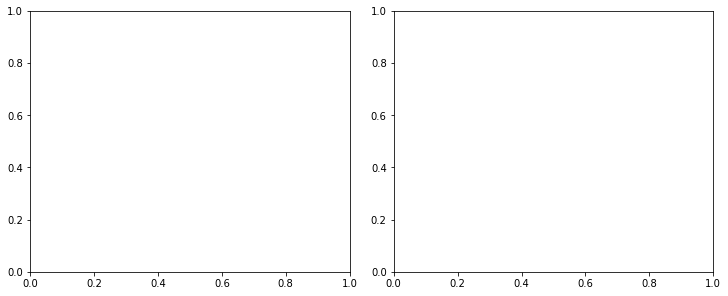

In [77]:
x_sim = model.simulate(x0, tspan)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(tspan, result[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(tspan, result[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(tspan, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(tspan, x_sim[:, 1], "k--")
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")


axs[1].plot(result[:, 0], result[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'b--', label="model", color='b', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()